##  Feature reduction, selection and pre-processing

### Make the learning easier or better  beforehand -  feature creation/selection
* PCA
* SelectKBest
* One-Hot Encoder

#### Principal component analysis (aka PCA) reduces the dimensions of a dataset down to get the most out of the information without a really big feature space
* Useful for very large feature space (e.g. say the botanist in charge of the iris dataset measured 100 more parts of the flower and thus there were 104 columns instead of 4)
* More about PCA on wikipedia [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [15]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

X, y = iris.data, iris.target

testy = np.random.randint(0, 3, 10)
print(testy)
print(type(iris.target_names))
iris.target_names[testy]

[2 2 1 1 2 0 1 0 0 2]
<class 'numpy.ndarray'>


array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica'], 
      dtype='<U10')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


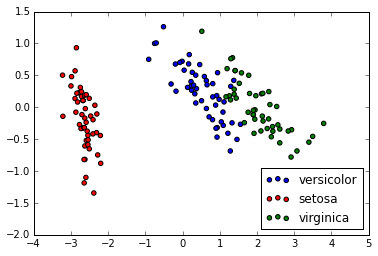

In [17]:
# PCA for dimensionality reduction

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

X, y = iris.data, iris.target

# perform principal component analysis
pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X_t = pca.transform(X)
(X_t[:, 0])

# import numpy and matplotlib for plotting (and set some stuff)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

# let's separate out data based on first two principle components
x1, x2 = X_t[:, 0], X_t[:, 1]


# please don't worry about details of the plotting below 
#  (note: you can get the iris names below from iris.target_names, also in docs)
c1 = np.array(list('rbg')) # colors
colors = c1[y] # y coded by color
classes = iris.target_names[y] # y coded by iris name
for (i, cla) in enumerate(set(classes)):
    xc = [p for (j, p) in enumerate(x1) if classes[j] == cla]
    yc = [p for (j, p) in enumerate(x2) if classes[j] == cla]
    cols = [c for (j, c) in enumerate(colors) if classes[j] == cla]
    plt.scatter(xc, yc, c = cols, label = cla)
plt.legend(loc = 4)

#### Selecting k top scoring features (also dimensionality reduction)

In [ ]:
# SelectKBest for selecting top-scoring features

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2

iris = datasets.load_iris()
X, y = iris.data, iris.target

print(X.shape)

# Do feature selection
#  input is scoring function (here chi2) to get univariate p-values
#  and number of top-scoring features (k) - here we get the top 2
X_t = SelectKBest(chi2, k = 2).fit_transform(X, y)

print(X_t.shape)

<b>Note on scoring function selection in `SelectKBest` tranformations:</b>
* For regression - f_regression
* For classification - chi2, f_classif

#### One Hot Encoding
* It's an operation on feature labels - a method of dummying variable
* Expands the feature space by nature of transform - later this can be processed further with a dimensionality reduction (the dummied variables are now their own features)
* FYI:  One hot encoding variables is needed for python ML module `tenorflow`
* The code cell below should help make this clear

In [ ]:
# OneHotEncoder for dummying variables

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

data = pd.DataFrame({'index': range(1, 7),
                    'state': ['WA', 'NY', 'CO', 'NY', 'CA', 'WA']})
print(data)

# We encode both our categorical variable and it's labels
enc = OneHotEncoder()
label_enc = LabelEncoder() # remember the labels here

# Encode labels (can use for discrete numerical values as well)
data_label_encoded = label_enc.fit_transform(data['state'])
data['state'] = data_label_encoded

# Encode and "dummy" variables
data_feature_one_hot_encoded = enc.fit_transform(data[['state']])

# Put into dataframe to look nicer and decode state dummy variables to original state values
# TRY:  compare the original input data (look at row numbers) to one hot encoding results
#   --> do they match??
pd.DataFrame(data_feature_one_hot_encoded.toarray(), columns = label_enc.inverse_transform(range(4)))

In [ ]:
# Encoded labels as dummy variables
print(data_label_encoded)

# Decoded
print(label_enc.inverse_transform(data_label_encoded))

EXERCISE:  Use one hot encoding to "recode" the iris data's extra suprise column (we are going to add a categorical variable here to play with...)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

a = pd.DataFrame(X, 
                columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

col5 = pd.DataFrame(np.random.randint(1, 4, size = len(y)))

X_plus = pd.concat([a, col5], axis = 1)
X_plus.head(20)

# ...now one-hot-encode...